### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BePlttHDgJoJBPmwuSLGsjMoeVWxy', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--bc467ba0-5cc2-4fe7-9b08-9697b9957134-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am Krish and i like to play cricket")

AIMessage(content="\n<think>\nOkay, the user is Krish and mentions liking to play cricket. Let me start by greeting him and showing enthusiasm. Maybe ask what position he plays, since that's a common topic among cricket fans. I should also mention some popular cricket leagues or teams to connect with him. Wait, should I ask about his favorite team or player? That could lead to a good conversation. Also, maybe mention a recent cricket event or tournament to make it current. Need to keep it friendly and open-ended so he feels comfortable sharing more. Let me check if I got all that. Yep, positions, teams, recent events. Alright, time to put that into a response.\n</think>\n\nHey Krish! That's awesome—I love cricket too! What position do you play? And do you have a favorite cricket team or player? Also, have you been watching any of the recent matches? Let's chat about it! 🏏", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 185, 'prompt_tokens': 20, 'total_to

### We Will start With Creating Nodes

In [7]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

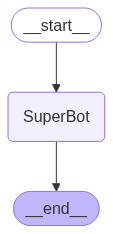

In [8]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='d052daed-cea5-41b9-b785-f0bcc27d6c6f'),
  AIMessage(content="\n<think>\nOkay, the user introduced themselves as Krish and mentioned they like cricket. I should respond in a friendly and welcoming way. Let me start by greeting them back and acknowledging their name and interest. Maybe I can ask them a follow-up question about cricket to keep the conversation going. I should make sure my tone is positive and approachable. Let me check if there's anything else I need to consider here. No, that seems straightforward. I'll make sure to use proper grammar and keep it concise.\n</think>\n\nHello Krish! Nice to meet you. That's a great interest—cricket is such a thrilling sport! Do you have a favorite team or player? 🏏", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 137, 'prompt_tokens': 20, 'total_tokens': 157, 'completion_time': 0.338681

#### Streaming The responses

In [10]:
for event in graph_builder.stream({"messages":"Hello My name is KRish"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='\n<think>\nOkay, the user said "Hello My name is KRish". I need to respond appropriately. Let me start with a friendly greeting. Maybe say hello back and mention their name. I should make sure to get the name right. They wrote "KRish" with capital letters, maybe it\'s how they prefer it spelled.\n\nI should ask how I can assist them today. Keep it open-ended so they can mention whatever they need help with. Maybe add an emoji to keep it friendly. Let me check for any possible typos in my response. Alright, that should be good. Let me put it all together.\n</think>\n\nHello Krish! Nice to meet you. How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 144, 'prompt_tokens': 16, 'total_tokens': 160, 'completion_time': 0.355020722, 'prompt_time': 0.003114132, 'queue_time': 0.259420308, 'total_time': 0.358134854}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_